# Neural Networks from Scratch

A neural network (NN) is an abstract model consisting of one or more layers that are connected in a certain way. The weighted connection between layers play a similar role to that of synapses. The main difference between NNs and the rule based statistical methods is that NNs can learn learn.

Let's start with the simplest neural network without any fancy extra stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We're familiar with this diagram of a neural network, with it's numerous "neurons" and "layers" but let's look at the simplest case. A single hidden layer with one neuron or node or as I like to call it, Simple Linear Regression!

Believe it or not, linear regression is a single neuron without any activation functions. This is the same linear regression that we learned in statistics 101. I guess we were AI practioners all this time without realizing it. Let's take a look at simple example of this. 

To get a good estimate of a line that explains the amount of variation in our data, we need some metric to assess the performance. An easy and reliable metric is the Mean Square Error!

0.49824496


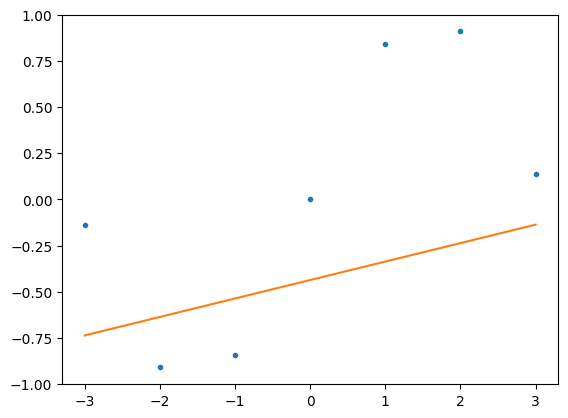

In [2]:
# data!
# we're looking at y as a function of x
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-0.14, -0.91, -0.84,  0,  0.84, 0.91,  0.14])

# weights and biases
w = np.array([0.1])
b = np.array([-.4364])

# our attempt at estimating y with guesses
output = w * x + b

# mean square error
# smaller is better
mse = np.mean((output-y)**2)
print(mse)

plt.plot(x, y, ".")
plt.plot(x, output)

Let's make it more complicated now, let's add another neuron shall we? Wait, What does it even mean to add another neuron?

In SLR, we assume each x value contributes EQUALLY to the prediction (just scaled by one weight). In neural networks, each x value can contribute DIFFERENTLY to each neuron (each has its own weight). 

Below we will fit a single 'hidden' layer with two neurons to our data. 

Adding another neuron means adding another "node" of weight and bias. So if we have two neurons, we will have two sets of weights and biases (eg: w1, b1, w2, b2). Therefore we will have to start guessing what these weights and biases are, such that we minimizes their mean square error.

In [3]:
# data!
# we're looking at y as a function of x
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-0.14, -0.91, -0.84,  0,  0.84, 0.91,  0.14])


# neuron 1 weights and biases
w1 = np.array([0.1])
b1 = np.array([-.4364])

# neuron 2 weight and bias
w2 = np.array([0.4])
b2 = np.array([-2.0])

# output from neuron 1 & neuron 2
n1 = w1 * x + b1 
n2 = w2 * x + b2

# our attempt at estimating y by combining weighted neurons 
output = 0.4 * n1 +  0.7 * n2

# we can also add an output bias
output = output + 0.1

# mean square error
# smaller is better
mse = np.mean((output-y)**2)
print(mse)

2.4645271935999995


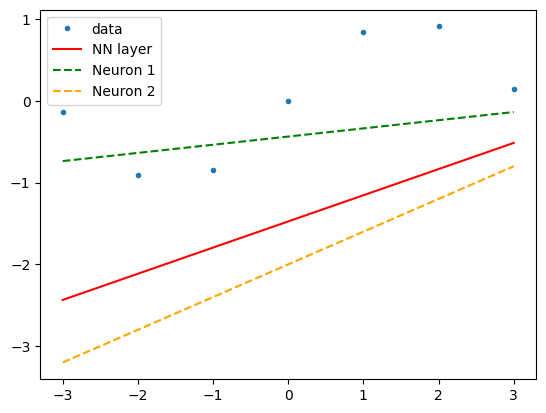

In [4]:
plt.plot(x, y, ".")
plt.plot(x, output, color = 'red')
plt.plot(x, n1, '--', color = 'green')
plt.plot(x, n2, '--', color = 'orange')
plt.legend(['data', 'NN layer', 'Neuron 1', 'Neuron 2'])

But clearly this isn't good enough, can we get a better fit? In SLR, we assume each x value contributes EQUALLY to the prediction (just scaled by one weight). In neural networks, each x value can contribute DIFFERENTLY to each neuron (each has its own weight). 

Below we will fit a single 'hidden' layer with two neurons to our data. 

“A hidden layer isn’t an input or output layer; as the scientist, you see data as they are handed to the input layer and the resulting data from the output layer. Layers between these endpoints have values that we don’t necessarily deal with, hence the name “hidden.” (Kinsley and Kukieła, p. 55)

Each neuron in a hidden layer has  a unique set of weights. During training phase, the model is fed a sample dataset $D$ where $[x_{1}, ..x_{N}]$ is the input matrix and $[y_{1}, ..y_{N}]$ is the output matrix.

“Neural networks become “deep” when they have 2 or more hidden layers.” (Kinsley and Kukieła, p. 55) 

In [5]:
#Using -1 tells NumPy to calculate the needed dimension for 1 column
x = x.reshape(-1, 1)  # 5 samples, 1 feature

y = np.array([-0.14, -0.91, -0.84,  0,  0.84, 0.91,  0.14])

# Weights - Hidden layer (2 neurons)
W1 = np.array([[0.2364], [0.4]])

# bias - Hidden layer (2 neurons)
b1 = np.array([[-0.4364], [-2.0]])    

# "Forward" pass to hidden layer
hidden_output = np.dot(x, W1.T) + b1.T

# Output layer (1 neuron)
W2 = np.array([[0.4, 0.7]])  # Weights connecting hidden to output
b2 = np.array([0.1])         # Output bias

# Forward pass to output layer
output = np.dot(hidden_output, W2.T) + b2  # Shape: (5,1)

# Mean square error
# flatten() converts any multi-dimensional array into a 1D array
mse = np.mean((output.flatten() - y)**2)
print(mse)

2.5200823679999997


So far we've been taking guesses at what the weights and biases can be, we plotted the values to how well the our outputted line fit the data. We need a better approach to find the "right" combination of biases such that they reduce the MSE or "loss". But clearly this isn't good enough, can we get a better fit? 

## Gradient Descent
Gradient descent is the optimization technique whereby we find the values for a function's parameter(s) (weights and biases) that minimize the image (output) of the function. This is achieved by iteratively adjusting the parameters in the direction opposite to the gradient of of the function with respect to those parameters. In neural networks, we use it to find the weights and biases that minimize the loss function. 

In our case, we're trying to minimize the mean square error. So What is the gradient of a function? It is simply the derivative.

“The partial derivative measures how much impact a single input has on a function’s output. Each of the function’s inputs has some impact on this function’s output, even if the impact is 0. We need to know these impacts; this means that we have to calculate the derivative with respect to each input separately to learn about each of them. That’s why we call these partial derivatives with respect to given input — we are calculating a partial of the derivative, related to a singular input. The partial derivative is a single equation, and the full multivariate function’s derivative consists of a set of equations called the gradient. In other words, the gradient is a vector of the size of inputs containing partial derivative solutions with respect to each of the inputs. We’ll get back to gradients shortly.” (Kinsley and Kukieła, p. 163)

Epoch 0, Loss: 2.4602
Epoch 1000, Loss: 0.2529
Epoch 2000, Loss: 0.2502
Epoch 3000, Loss: 0.2502
Epoch 4000, Loss: 0.2502
Epoch 5000, Loss: 0.2502
Epoch 6000, Loss: 0.2502
Epoch 7000, Loss: 0.2502
Epoch 8000, Loss: 0.2502
Epoch 9000, Loss: 0.2502
Training complete!
Final loss (MSE): 0.2502
Learned parameters:
w1: 0.3387, b1: -0.2753
w2: 0.4700, b2: -1.8663
Output weights: [0.3879, 0.1885], bias: 0.4587


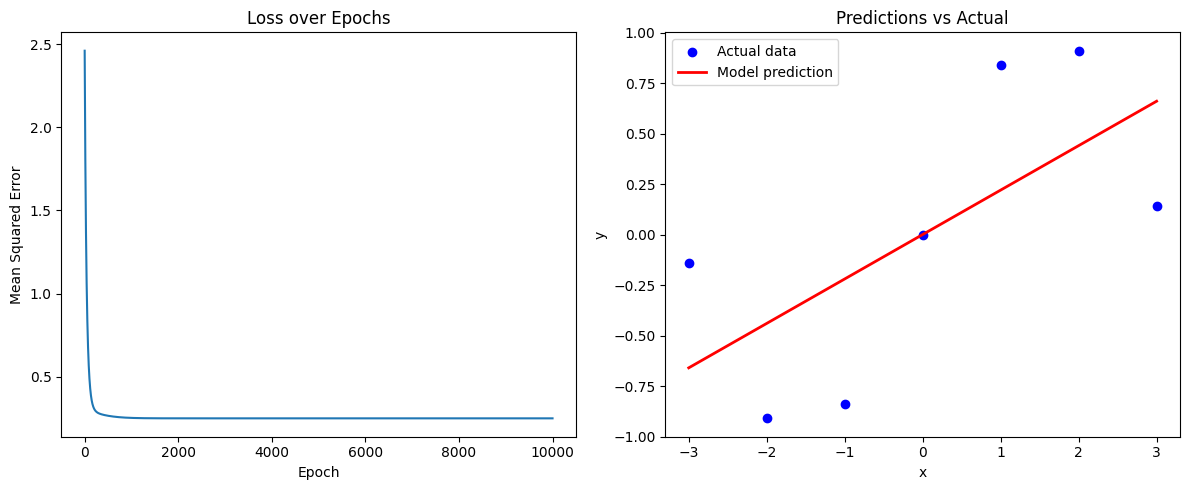

In [6]:
# Data
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([-0.14, -0.91, -0.84,  0,  0.84, 0.91,  0.14])

# Initial parameters (weights and biases)
w1 = np.array([0.2])
b1 = np.array([-0.4])
w2 = np.array([0.4])
b2 = np.array([-2.0])

w_output = np.array([0.4, 0.7])  # Weights for combining neurons
b_output = np.array([0.1])       # Output bias

# Hyperparameters
learning_rate = 0.001
epochs = 10000

# Lists to store loss for plotting
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    n1 = w1 * x + b1  # First neuron output
    n2 = w2 * x + b2  # Second neuron output
    
    # Combine neurons for final output
    output = w_output[0] * n1 + w_output[1] * n2 + b_output
    
    # Calculate loss (MSE)
    loss = np.mean((output - y) ** 2)
    loss_history.append(loss)
    
    # Calculate gradients using chain rule
    # Start from the output layer and work backwards
    
    # Gradient of loss with respect to output
    d_loss_d_output = 2 * (output - y) 
    
    # Gradients for output layer parameters
    d_loss_d_w_output0 = np.mean(d_loss_d_output * n1)
    d_loss_d_w_output1 = np.mean(d_loss_d_output * n2)
    d_loss_d_b_output = np.mean(d_loss_d_output)
    
    # Gradients for first neuron parameters
    d_loss_d_n1 = d_loss_d_output * w_output[0]
    d_loss_d_w1 = np.mean(d_loss_d_n1 * x)
    d_loss_d_b1 = np.mean(d_loss_d_n1)
    
    # Gradients for second neuron parameters
    d_loss_d_n2 = d_loss_d_output * w_output[1]
    d_loss_d_w2 = np.mean(d_loss_d_n2 * x)
    d_loss_d_b2 = np.mean(d_loss_d_n2)
    
    # Update parameters (weights and biases)
    w_output[0] -= learning_rate * d_loss_d_w_output0
    w_output[1] -= learning_rate * d_loss_d_w_output1
    b_output -= learning_rate * d_loss_d_b_output
    
    w1 -= learning_rate * d_loss_d_w1
    b1 -= learning_rate * d_loss_d_b1
    
    w2 -= learning_rate * d_loss_d_w2
    b2 -= learning_rate * d_loss_d_b2
    
    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final forward pass with trained parameters
n1 = w1 * x + b1
n2 = w2 * x + b2
predicted = w_output[0] * n1 + w_output[1] * n2 + b_output
final_loss = np.mean((predicted - y) ** 2)

print(f"Training complete!")
print(f"Final loss (MSE): {final_loss:.4f}")
print(f"Learned parameters:")
print(f"w1: {w1[0]:.4f}, b1: {b1[0]:.4f}")
print(f"w2: {w2[0]:.4f}, b2: {b2[0]:.4f}")
print(f"Output weights: [{w_output[0]:.4f}, {w_output[1]:.4f}], bias: {b_output[0]:.4f}")

# Visualize results
plt.figure(figsize=(12, 5))

# Plot loss over time
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(x, y, label='Actual data', color='blue')
plt.plot(x, predicted, 'r-', label='Model prediction', linewidth=2)
plt.title('Predictions vs Actual')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## Activation Functions
Activation Functions in a layer defines a threshold that decides whether the information that a neuron has in a layer will be relevant for further calculations or not.

“The activation of each output unit of a feedforward Artificial Neural Network (ANN) is a nonlinear function of the activation patterns over the network’s input units. The functions are parameterized by the network’s connection weights. An ANN with no hidden layers can represent only a very small fraction of the possible input-output functions. However an ANN with a single hidden layer containing a large enough finite number of sigmoid units can approximate any continuous function on a compact region of the network’s input space to any degree of accuracy (Cybenko, 1989). This is also true for other nonlinear activation functions that satisfy mild conditions, but nonlinearity is essential: if all the units in a multi-layer feedforward ANN have linear activation functions, the entire network is equivalent to a network with no hidden layers (because linear functions of linear functions are themselves linear).” (Sutton and Barto, 2018, p. 224)

In [7]:
def activation(x, type = None):
    if type == "relu":
        return np.maximum(0, x)
    elif type == "tanh":
        return np.tanh(x)
    

def activation_derivative(x, type = None):
    if type == "relu":
        return np.where(x > 0, 1, 0)
    elif type == "tanh":
        return 1 - np.tanh(x)**2


Epoch 0, Loss: 0.4509
Epoch 1000, Loss: 0.3395
Epoch 2000, Loss: 0.3183
Epoch 3000, Loss: 0.3111
Epoch 4000, Loss: 0.3070
Epoch 5000, Loss: 0.3041
Epoch 6000, Loss: 0.3019
Epoch 7000, Loss: 0.3001
Epoch 8000, Loss: 0.2986
Epoch 9000, Loss: 0.2972
Epoch 10000, Loss: 0.2960
Epoch 11000, Loss: 0.2948
Epoch 12000, Loss: 0.2938
Epoch 13000, Loss: 0.2928
Epoch 14000, Loss: 0.2918
Epoch 15000, Loss: 0.2909
Epoch 16000, Loss: 0.2891
Epoch 17000, Loss: 0.2873
Epoch 18000, Loss: 0.2854
Epoch 19000, Loss: 0.2835
Epoch 20000, Loss: 0.2815
Epoch 21000, Loss: 0.2793
Epoch 22000, Loss: 0.2769
Epoch 23000, Loss: 0.2741
Epoch 24000, Loss: 0.2707
Epoch 25000, Loss: 0.2664
Epoch 26000, Loss: 0.2603
Epoch 27000, Loss: 0.2502
Epoch 28000, Loss: 0.2290
Epoch 29000, Loss: 0.2193
Epoch 30000, Loss: 0.2178
Epoch 31000, Loss: 0.2169
Epoch 32000, Loss: 0.2164
Epoch 33000, Loss: 0.2162
Epoch 34000, Loss: 0.2160
Epoch 35000, Loss: 0.2160
Epoch 36000, Loss: 0.2159
Epoch 37000, Loss: 0.2159
Epoch 38000, Loss: 0.2159

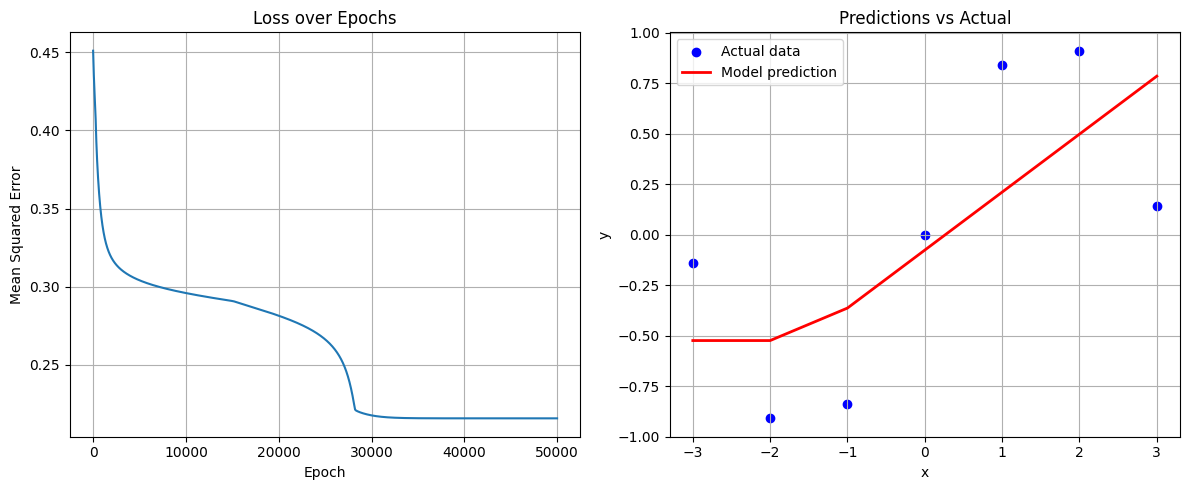

In [8]:
# Data
X = np.array([-3, -2, -1, 0, 1, 2, 3]).reshape(-1, 1)  
y = np.array([-0.14, -0.91, -0.84, 0, 0.84, 0.91, 0.14]).reshape(-1, 1) 

# Network architecture
input_size = 1
hidden_size = 2  # Two neurons in the hidden layer
output_size = 1
n_samples = X.shape[0]

# Initialize parameters - using the original weights but reshaping appropriately
W1 = np.array([[0.2364], [0.4]])  # Shape: (hidden_size, input_size)
b1 = np.array([[-0.4364], [-2.0]])  # Shape: (hidden_size, 1)

W2 = np.array([[0.4, 0.7]])  # Shape: (output_size, hidden_size)
b2 = np.array([[0.1]])  # Shape: (output_size, 1)

# Hyperparameters
learning_rate = 0.001
epochs = 50000

# Lists to store loss for plotting
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    # Input to hidden layer
    Z1 = np.dot(X, W1.T) + b1.T  # Shape: (n_samples, hidden_size)
    A1 = activation(Z1, type="relu")  # Shape: (n_samples, hidden_size)
    
    # Hidden to output layer
    Z2 = np.dot(A1, W2.T) + b2.T  # Shape: (n_samples, output_size)
    output = Z2  # Shape: (n_samples, output_size)
    
    # Calculate loss (MSE)
    loss = np.mean((output - y) ** 2)
    loss_history.append(loss)
    
    # Backpropagation
    # Gradient of loss with respect to output
    d_loss_d_output = 2 * (output - y)  # Shape: (n_samples, output_size)
    
    # Gradients for output layer
    d_loss_d_W2 = np.dot(d_loss_d_output.T, A1)  # Shape: (output_size, hidden_size)
    d_loss_d_b2 = np.mean(d_loss_d_output).T  # Shape: (output_size, 1)
    
    # Gradient for hidden layer
    d_loss_d_A1 = np.dot(d_loss_d_output, W2)  # Shape: (n_samples, hidden_size)
    d_loss_d_Z1 = d_loss_d_A1 * activation_derivative(Z1, type="relu")  # Shape: (n_samples, hidden_size)
    
    d_loss_d_W1 = np.dot(d_loss_d_Z1.T, X)  # Shape: (hidden_size, input_size)
    d_loss_d_b1 = np.mean(d_loss_d_Z1).T  # Shape: (hidden_size, 1)
    
    # Update parameters
    W2 -= learning_rate * d_loss_d_W2
    b2 -= learning_rate * d_loss_d_b2
    
    W1 -= learning_rate * d_loss_d_W1
    b1 -= learning_rate * d_loss_d_b1
    
    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final forward pass for predictions
Z1 = np.dot(X, W1.T) + b1.T
A1 = activation(Z1, type="relu")
Z2 = np.dot(A1, W2.T) + b2.T
predicted = Z2

final_loss = np.mean((predicted - y) ** 2)

# Print results
print(f"Training complete!")
print(f"Final loss (MSE): {final_loss:.4f}")
print(f"Learned parameters:")
print(f"W1[0]: {W1[0][0]:.4f}, b1[0]: {b1[0][0]:.4f}")
print(f"W1[1]: {W1[1][0]:.4f}, b1[1]: {b1[1][0]:.4f}")
print(f"W2: [{W2[0][0]:.4f}, {W2[0][1]:.4f}], b2: {b2[0][0]:.4f}")

# Visualization code
plt.figure(figsize=(12, 5))

# Plot loss over time
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Actual data', color='blue')
plt.plot(X, predicted, 'r-', label='Model prediction', linewidth=2)
plt.title('Predictions vs Actual')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Epoch 0, Loss: 1.4778
Epoch 5000, Loss: 0.0389
Epoch 10000, Loss: 0.0343
Epoch 15000, Loss: 0.0280
Epoch 20000, Loss: 0.0229
Epoch 25000, Loss: 0.0197
Epoch 30000, Loss: 0.0173
Epoch 35000, Loss: 0.0155
Epoch 40000, Loss: 0.0141
Epoch 45000, Loss: 0.0129
Training complete!
Final loss (MSE): 0.0120
Learned parameters:
W1[0]: -0.8608, b1[0]: -0.0000
W1[1]: -0.2279, b1[1]: -0.0000
W2: [-2.4998, 3.7461], b2: -0.0000


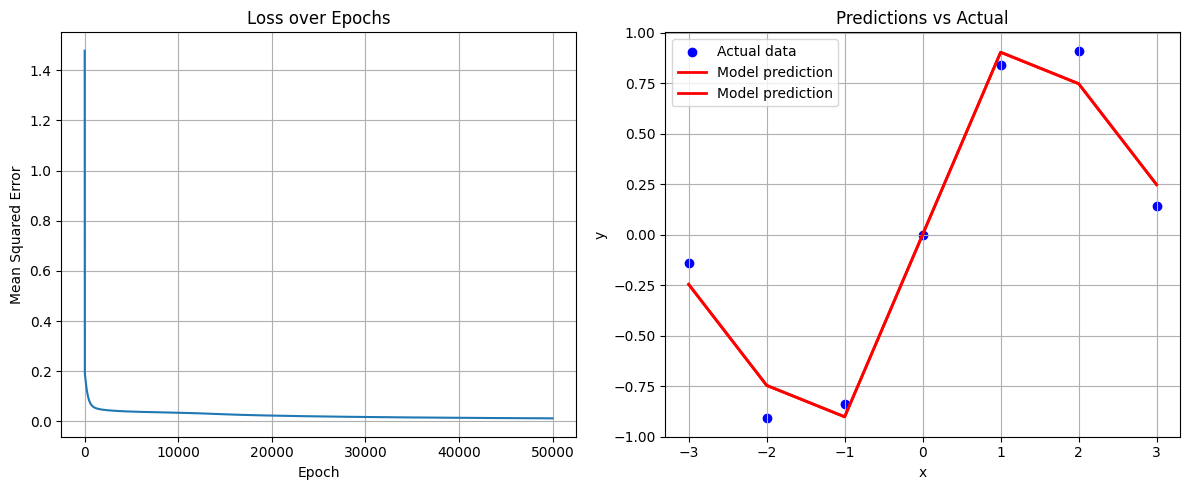

In [9]:
# Data
X = np.array([-3, -2, -1, 0, 1, 2, 3]).reshape(-1, 1)  
y = np.array([-0.14, -0.91, -0.84, 0, 0.84, 0.91, 0.14]).reshape(-1, 1) 

# Network architecture
input_size = 1
hidden_size = 2  # neurons in the hidden layer
output_size = 1
n_samples = X.shape[0]

# Initialize parameters - using the original weights but reshaping appropriately
W1 = np.random.randn(hidden_size, 1)  # Shape: (hidden_size, input_size)
b1 = np.zeros((hidden_size, 1))  # Shape: (hidden_size, 1)

W2 = np.random.randn(2, hidden_size)  # Shape: (output_size, hidden_size)
b2 = np.zeros((output_size, 1))  # Shape: (output_size, 1)

# Hyperparameters
learning_rate = 0.001
epochs = 50000

# Lists to store loss for plotting
loss_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    # Input to hidden layer
    Z1 = np.dot(X, W1.T) + b1.T  # Shape: (n_samples, hidden_size)
    A1 = activation(Z1, type="tanh")  # Shape: (n_samples, hidden_size)
    
    # Hidden to output layer
    Z2 = np.dot(A1, W2.T) + b2.T  # Shape: (n_samples, output_size)
    output = Z2  # Shape: (n_samples, output_size)
    
    # Calculate loss (MSE)
    loss = np.mean((output - y) ** 2)
    loss_history.append(loss)
    
    # Backpropagation
    # Gradient of loss with respect to output
    d_loss_d_output = 2 * (output - y)  # Shape: (n_samples, output_size)
    
    # Gradients for output layer
    d_loss_d_W2 = np.dot(d_loss_d_output.T, A1)  # Shape: (output_size, hidden_size)
    d_loss_d_b2 = np.mean(d_loss_d_output).T  # Shape: (output_size, 1)
    
    # Gradient for hidden layer
    d_loss_d_A1 = np.dot(d_loss_d_output, W2)  # Shape: (n_samples, hidden_size)
    d_loss_d_Z1 = d_loss_d_A1 * activation_derivative(Z1, type="tanh")  # Shape: (n_samples, hidden_size)
    
    d_loss_d_W1 = np.dot(d_loss_d_Z1.T, X)  # Shape: (hidden_size, input_size)
    d_loss_d_b1 = np.mean(d_loss_d_Z1).T  # Shape: (hidden_size, 1)
    
    # Update parameters
    W2 -= learning_rate * d_loss_d_W2
    b2 -= learning_rate * d_loss_d_b2
    
    W1 -= learning_rate * d_loss_d_W1
    b1 -= learning_rate * d_loss_d_b1
    
    # Print progress
    if epoch % 5000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final forward pass for predictions
Z1 = np.dot(X, W1.T) + b1.T
A1 = activation(Z1, type="tanh")
Z2 = np.dot(A1, W2.T) + b2.T
predicted = Z2

final_loss = np.mean((predicted - y) ** 2)

# Print results
print(f"Training complete!")
print(f"Final loss (MSE): {final_loss:.4f}")
print(f"Learned parameters:")
print(f"W1[0]: {W1[0][0]:.4f}, b1[0]: {b1[0][0]:.4f}")
print(f"W1[1]: {W1[1][0]:.4f}, b1[1]: {b1[1][0]:.4f}")
print(f"W2: [{W2[0][0]:.4f}, {W2[0][1]:.4f}], b2: {b2[0][0]:.4f}")

# Visualization code
plt.figure(figsize=(12, 5))

# Plot loss over time
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Actual data', color='blue')
plt.plot(X, predicted, 'r-', label='Model prediction', linewidth=2)
plt.title('Predictions vs Actual')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# PyTorch

PyTorch is an open-source machine learning library primarily developed by Facebook's AI Research lab. It has become one of the most popular frameworks for deep learning research and applications alongside TensorFlow. PyTorch provides a flexible, intuitive interface for building and training neural networks, combining the power of GPU acceleration with an easy-to-use Python API.

## What are Tensors?
At the heart of PyTorch lies the concept of tensors. Tensors are multi-dimensional arrays similar to NumPy arrays, but with additional capabilities:
- They can run on GPUs
- Tensors can track operations like automatic differentiation through their dynamic computational graphs

Essentially numpy arrays on steriods. 

Epoch 0, Loss: 0.7670
Epoch 50, Loss: 0.1161
Epoch 100, Loss: 0.0795
Epoch 150, Loss: 0.0313
Epoch 200, Loss: 0.0132
Epoch 250, Loss: 0.0021
Epoch 300, Loss: 0.0001
Epoch 350, Loss: 0.0000
Epoch 400, Loss: 0.0000
Epoch 450, Loss: 0.0000
Training complete!
Final loss (MSE): 0.0000


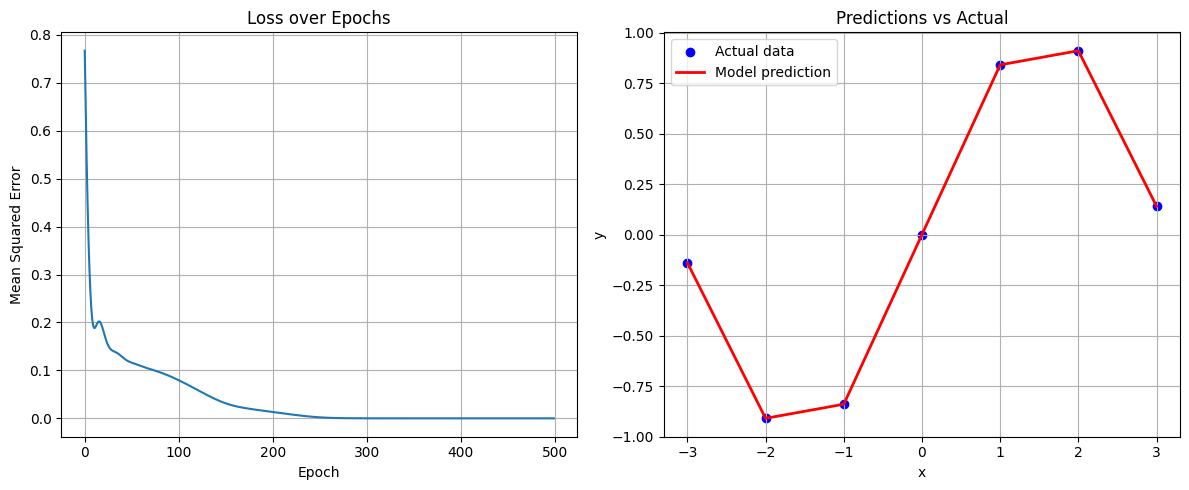

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Data - converting NumPy arrays to PyTorch tensors
X = torch.tensor([-3, -2, -1, 0, 1, 2, 3], dtype=torch.float32).view(-1, 1)
y = torch.tensor([-0.14, -0.91, -0.84, 0, 0.84, 0.91, 0.14], dtype=torch.float32).view(-1, 1)

# Network architecture parameters
input_size = 1
hidden_size = 8
output_size = 1

# Define neural network using PyTorch's nn.Module
class SineNet(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):

        super(SineNet, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.activation = nn.Tanh()
        self.output = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.activation(x)
        x = self.hidden2(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# Initialize model, loss function, and optimizer
model = SineNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Using Adam optimizer instead of gradient descent

# Lists to store loss for plotting
loss_history = []

# Training loop
epochs = 500
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    loss_history.append(loss.item())
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predicted = model(X)
    final_loss = criterion(predicted, y).item()

print(f"Training complete!")
print(f"Final loss (MSE): {final_loss:.4f}")

# Visualization code
plt.figure(figsize=(12, 5))

# Plot loss over time
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(X.numpy(), y.numpy(), label='Actual data', color='blue')
plt.plot(X.numpy(), predicted.numpy(), 'r-', label='Model prediction', linewidth=2)
plt.title('Predictions vs Actual')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Test the model with more points to see how well it generalizes
X_test = torch.linspace(-4, 4, 100).view(-1, 1)
with torch.no_grad():
    y_pred = model(X_test)





0.010566661
0.025221879


C:\Users\Vinay\AppData\Local\Temp\ipykernel_593732\408065065.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coefficient = (-1) ** n / np.math.factorial(term)


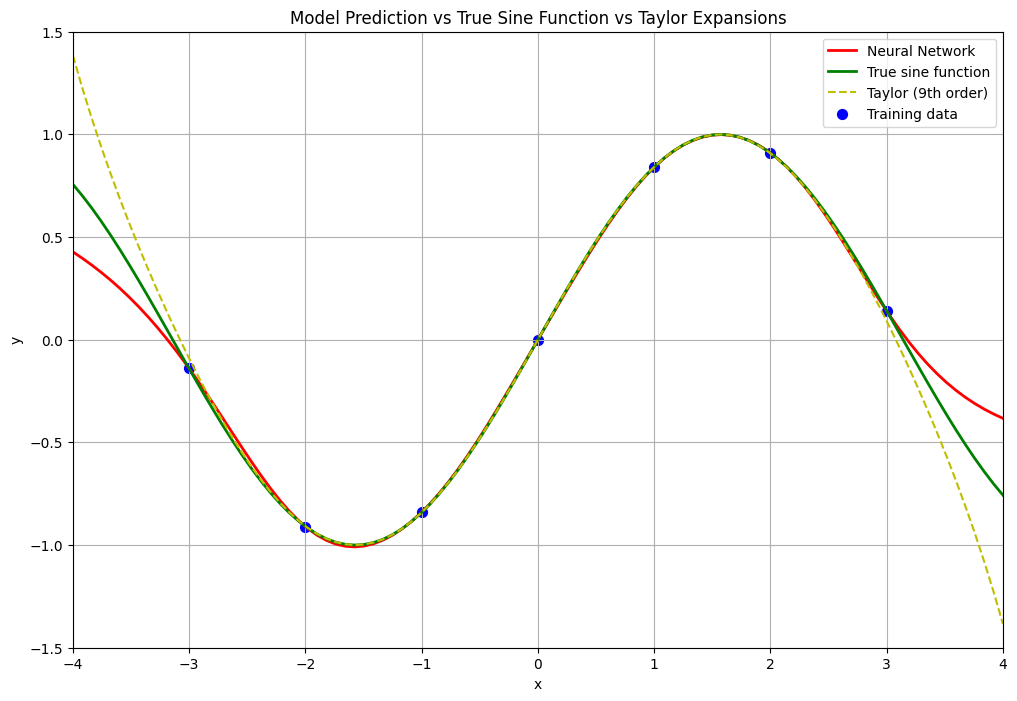

In [25]:
# Calculate Taylor expansion of sine
def sine_taylor_expansion(x, terms=5):

    result = np.zeros_like(x)
    for n in range(terms):
        term = 2 * n + 1  # 1, 3, 5, 7, ...
        coefficient = (-1) ** n / np.math.factorial(term)
        result += coefficient * x ** term
    return result



# Calculate different orders of Taylor expansion
x_numpy = X_test.numpy()

true_sine = np.sin(X_test.numpy())
nn_pred = y_pred.numpy()
taylor_approx = sine_taylor_expansion(x_numpy, terms=4)

print(np.mean((true_sine - nn_pred)**2))
print(np.mean((true_sine - taylor_approx)**2))


# Plot the full prediction curve with Taylor expansions
plt.figure(figsize=(12, 8))
plt.plot(X_test.numpy(), y_pred.numpy(), 'r-', linewidth=2, label='Neural Network')
plt.plot(X_test.numpy(), np.sin(X_test.numpy()), 'g-', linewidth=2, label='True sine function')
plt.plot(X_test.numpy(), taylor_approx, 'y--', linewidth=1.5, label='Taylor (9th order)')
plt.scatter(X.numpy(), y.numpy(), color='blue', s=50, label='Training data')
plt.title('Model Prediction vs True Sine Function vs Taylor Expansions')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4, 4)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
plt.show()

## Loading MNIST digits data

Infamous and classic machine learning dataset

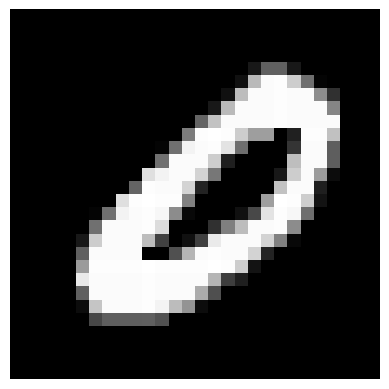

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = np.array(pd.read_csv('train.csv'))
np.random.shuffle(data)

m, n = data.shape

test = data[0:5000].T
y_test = test[0]
x_test = (test[1:n])/255

train = data[5000:m].T
y_train = train[0]
x_train = (train[1:n])/255


# Display image
plt.imshow(x_train[:, 420].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()


## Loading data into pyTorch Tensors 

In [44]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms

x_train_tensor = torch.FloatTensor(x_train.T)  # Shape: [samples, 784]
y_train_tensor = torch.LongTensor(y_train.astype(int))  # Shape: [samples]

x_test_tensor = torch.FloatTensor(x_test.T)  # Shape: [samples, 784]
y_test_tensor = torch.LongTensor(y_test.astype(int)) 

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

class VinayNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        
        # When you write a class, you want other classes to be able to use it. super() makes it easier for other classes to use the class you're writing.
        super().__init__()

        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.act2 = nn.ReLU()
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.act1(x)
        x = self.hidden2(x)
        x = self.act2(x)
        x = self.out(x)
        return x

input_size = 784
hidden_size = 16
output_size = 10

model = VinayNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_history = []

episodes = 51
for ep in range(episodes):
    running_loss = 0.0
    for input, labels in train_loader:
        input = input.view(-1, 784)
        output = model(input)
        loss = criterion(output, labels)
        
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(running_loss)
    if ep % 50 == 0:
        print(loss.item())
    
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    test_logits, test_predicted = torch.max(test_outputs, 1)
    test_correct = (test_predicted == y_test_tensor).sum().item()
    test_accuracy = test_correct / y_test_tensor.size(0)

print(test_accuracy)

1.005834937095642
0.3817726969718933
0.947


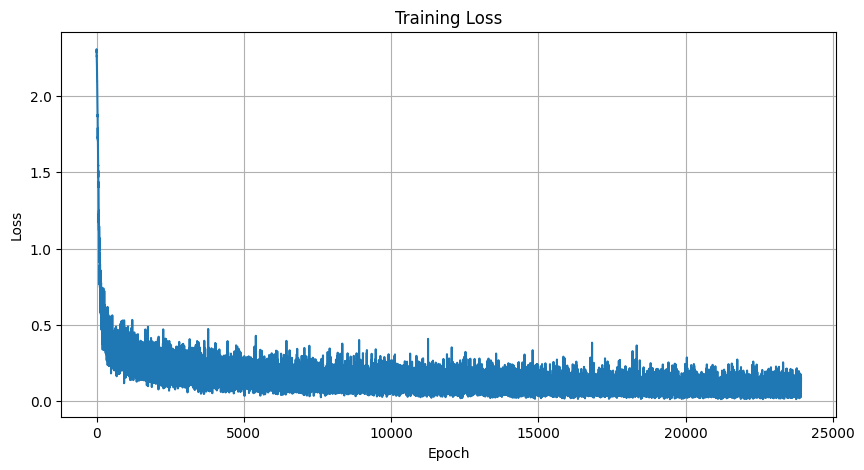

Prediction: 4
Actual: 4


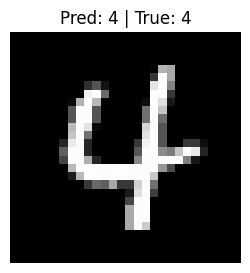

Prediction: 5
Actual: 5


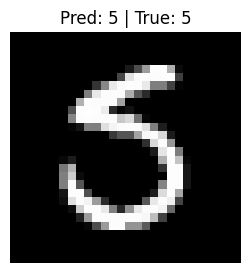

Prediction: 1
Actual: 1


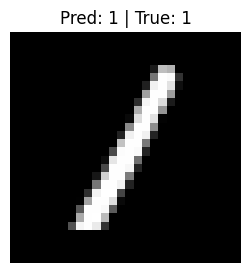

Prediction: 1
Actual: 1


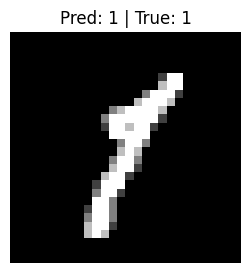

Prediction: 1
Actual: 1


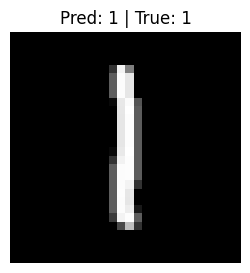

In [ ]:
# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Function to display test predictions
def test_prediction(index):
    model.eval()
    with torch.no_grad():
        img = x_test_tensor[index:index+1]
        output = model(img)
        max_logit, predicted = torch.max(output, 1)
        
    print(f"Prediction: {predicted.item()}")
    print(f"Actual: {y_test_tensor[index].item()}")
    
    # Display image
    plt.figure(figsize=(3, 3))
    plt.imshow(x_test_tensor[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted.item()} | True: {y_test_tensor[index].item()}")
    plt.axis('off')
    plt.show()

# Test a few examples
for i in range(5):
    test_prediction(i)

# `pip install opencv-python`

The following code is just convert an image to MNIST format

In [17]:
import cv2

def preprocess_digit(image_path, target_size=(28, 28)):

    # Read the image and convert to grayscale
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image {image_path}")
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image - Otsu works well for clear handwriting on white paper
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours to identify the digit
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # If contours exist, find the largest one (should be the digit)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Add some padding
        padding = 4
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(binary.shape[1], x + w + padding)
        y_end = min(binary.shape[0], y + h + padding)
        
        # Extract the digit
        digit = binary[y_start:y_end, x_start:x_end]
    else:
        # If no contours found, use the whole image
        digit = binary
    
    # Make square by padding
    h, w = digit.shape
    if h > w:
        diff = h - w
        pad_left = diff // 2
        pad_right = diff - pad_left
        digit = cv2.copyMakeBorder(digit, 0, 0, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)
    else:
        diff = w - h
        pad_top = diff // 2
        pad_bottom = diff - pad_top
        digit = cv2.copyMakeBorder(digit, pad_top, pad_bottom, 0, 0, cv2.BORDER_CONSTANT, value=0)
    
    # Resize to target size
    digit = cv2.resize(digit, target_size, interpolation=cv2.INTER_AREA)
    
    # Normalize to [0, 1]
    mnist_img = digit / 255.0
    
    # Create PyTorch tensor and add batch dimension
    tensor_img = torch.FloatTensor(mnist_img).unsqueeze(0)
    
    # Flatten the tensor to match model input shape (if needed)
    if len(tensor_img.shape) == 3:  # [batch, height, width]
        tensor_img = tensor_img.reshape(1, -1)  # Flatten to [batch, 784]
    
    return mnist_img, tensor_img

# Example usage with visualization
def test_digit_preprocessing(image_path):

    # Preprocess the digit
    mnist_img, tensor_img = preprocess_digit(image_path)
    
    # Display original image
    orig_img = cv2.imread(image_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    # Show original image
    ax1.imshow(orig_img)
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    # Show processed image
    ax2.imshow(mnist_img, cmap='gray')
    ax2.set_title("Processed Image (MNIST format)")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Tensor shape: {tensor_img.shape}")
    
    return mnist_img, tensor_img

# Example:
# mnist_img, tensor_img = preprocess_digit("six.jpg")
# Or with visualization:
# mnist_img, tensor_img = test_digit_preprocessing("six.jpg")

Prediction: 8


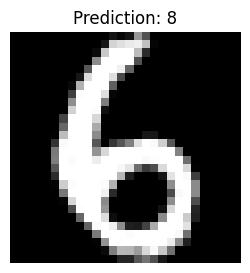

In [43]:
# 1. Load and preprocess your custom image
mnist_img, tensor_img = preprocess_digit("digits/six.jpg")

# 2. Reshape the tensor if needed - this depends on your model's input shape
# If your model expects flattened input (784 features):
if tensor_img.shape[1:] != (784,):
    tensor_img = tensor_img.reshape(1, 784)

# 3. Use your model to make a prediction
model.eval()
with torch.no_grad():
    output = model(tensor_img)
    data, predicted = torch.max(output, 1)

# 4. Display the result
print(f"Prediction: {predicted.item()}")

plt.figure(figsize=(3, 3))
plt.imshow(mnist_img, cmap='gray')
plt.title(f"Prediction: {predicted.item()}")
plt.axis('off')
plt.show()

## Resources

- https://statquest.org/essential-matrix-algebra-for-neural-networks-clearly-explained/
- https://blog.ezyang.com/2019/05/pytorch-internals/
- https://youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&si=PGB3dIskdyQmHopE
- https://nnfs.io/